In [42]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [22]:
data = pd.read_csv("datas2.csv", sep=";", low_memory=False)

In [23]:
print (data.columns)

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

<AxesSubplot:ylabel='hospital_death'>

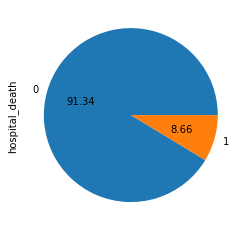

In [24]:
# piechart de la colonne death
data.hospital_death.value_counts().plot.pie(autopct="%.2f")

In [25]:
data.head(10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,113303,63835,185,77.0,"26,82287414",0,African American,M,"172,7",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
1,100799,68271,6,19.0,"22,89090402",0,Asian,M,"167,6",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
2,97702,25893,77,49.0,"33,85575384",0,Caucasian,F,"167,6",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,66955,4599,19,52.0,"36,35802469",0,African American,F,180,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,90681,1541,132,83.0,"29,27783633",0,Caucasian,F,"152,4",Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
5,99310,41424,194,69.0,"37,39825738",0,Caucasian,F,167,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
6,13536,117493,55,NaN,"27,58732606",0,Caucasian,F,157,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
7,30959,59793,109,37.0,"37,07344152",1,Caucasian,F,"154,94",Operating Room / Recovery,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
8,88856,42935,17,53.0,"43,93731832",0,Caucasian,M,173,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
9,25638,121727,196,82.0,"29,76690284",0,Caucasian,F,"162,6",Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,1


In [26]:
data.describe()

,encounter_id,patient_id,hospital_id,age,elective_surgery,icu_id,apache_2_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,...,d1_glucose_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,82542.000000,82542.000000,82542.000000,78711.000000,82542.000000,82542.000000,81054.000000,82542.000000,81893.000000,80830.000000,...,77323.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,81893.000000,82542.000000
mean,65622.992016,65529.454460,105.750672,62.332762,0.183652,508.301883,185.363091,0.201231,0.027963,3.463479,...,114.376330,0.000867,0.015642,0.225611,0.012919,0.026449,0.007180,0.004249,0.020368,0.086623
std,37811.749680,37775.860453,62.867370,16.760189,0.387202,229.036238,86.020273,0.400923,0.164869,0.952728,...,38.210161,0.029432,0.124088,0.417987,0.112927,0.160468,0.084431,0.065050,0.141257,0.281283
min,1.000000,1.000000,2.000000,16.000000,0.000000,82.000000,101.000000,0.000000,0.000000,1.000000,...,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32870.250000,32853.250000,47.000000,52.000000,0.000000,369.000000,113.000000,0.000000,0.000000,3.000000,...,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65686.000000,65400.500000,111.000000,65.000000,0.000000,504.000000,122.000000,0.000000,0.000000,4.000000,...,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98449.750000,98284.500000,161.000000,75.000000,0.000000,679.000000,301.000000,0.000000,0.000000,4.000000,...,131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,1.000000,927.000000,308.000000,1.000000,1.000000,4.000000,...,288.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
pd.set_option("display.max_rows",84)

In [28]:
data.dtypes

encounter_id                       int64
patient_id                         int64
hospital_id                        int64
age                              float64
bmi                               object
elective_surgery                   int64
ethnicity                         object
gender                            object
height                            object
icu_admit_source                  object
icu_id                             int64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                  object
weight                            object
apache_2_diagnosis               float64
apache_3j_diagnosis               object
apache_post_operative              int64
arf_apache                       float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache

In [30]:
targets = data.hospital_death
features = data.drop(["hospital_death"], axis=1)

In [36]:
print(features.shape)
print(targets.shape)

(82542, 83)
(82542,)


In [37]:
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, train_size=0.9, random_state=42, shuffle=True, stratify=targets)

In [38]:
print(train_features.shape)
print(train_targets.shape)
print(test_features.shape)
print(test_targets.shape)

(74287, 83)
(74287,)
(8255, 83)
(8255,)


In [43]:
data.isnull().sum().sort_values(ascending=False)

d1_potassium_max                 8607
d1_potassium_min                 8607
h1_mbp_noninvasive_max           8167
h1_mbp_noninvasive_min           8167
apache_4a_icu_death_prob         7171
apache_4a_hospital_death_prob    7171
h1_diasbp_noninvasive_max        6629
h1_diasbp_noninvasive_min        6629
h1_sysbp_noninvasive_min         6622
h1_sysbp_noninvasive_max         6622
d1_glucose_max                   5219
d1_glucose_min                   5219
h1_mbp_min                       4141
h1_mbp_max                       4141
h1_resprate_max                  3917
h1_resprate_min                  3917
age                              3831
h1_spo2_max                      3774
h1_spo2_min                      3774
temp_apache                      3667
h1_diasbp_max                    3244
h1_diasbp_min                    3244
h1_sysbp_min                     3238
h1_sysbp_max                     3238
bmi                              3089
h1_heartrate_min                 2497
h1_heartrate

In [ ]:
encoder=OrdinalEncoder
train_features_encoded=

In [41]:
classifier=RandomForestClassifier()
classifier.fit(train_features, train_targets)

ValueError: could not convert string to float: '32,49392196'